# Toy-to-Theory: Bag of Words & Naive Bayes from Scratch
This notebook is part of my *toy-to-theory* series, where I build machine-learning models from scratch starting with first principles.

### 1. Foundations: Optimization and Searching

What do we mean by optimization? To optimize - in summary is to maximize or minimize a function on a specific domain. For instance: given $f(x)=x^2$, $x\in D$ where $D = [0,2]$

$\text{max}_{x\in D}\{f(x)\}$ is just $y^*$ where $y^*>=y$, for every $y\in \text{range}(f)$ and we can identically define $\text{min}$.

So let's maximize our function:

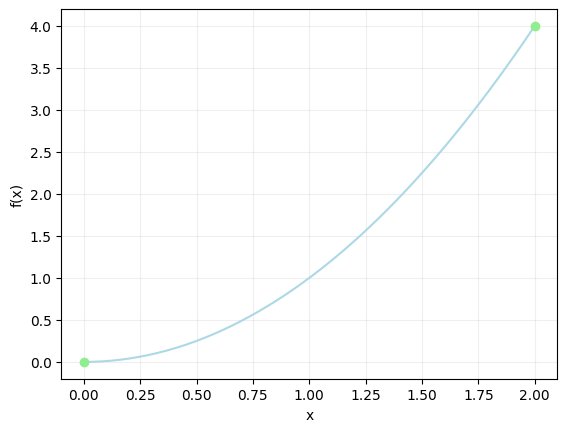

In [67]:
import numpy as np
import matplotlib.pyplot as plt

D = np.linspace(start=0, stop=2, num=50, dtype=float)


def f(x):
    return x**2


range_of_f = f(D)

range_of_f = f(D)

fig, ax = plt.subplots()
ax.plot(D, range_of_f, color="lightblue")
min_index = np.argmin(range_of_f)
min_x = D[min_index]
min_y = range_of_f[min_index]

max_index = np.argmax(range_of_f)
max_x = D[max_index]
max_y = range_of_f[max_index]

ax.plot(max_x, max_y, marker="o", color="lightgreen")
ax.plot(min_x, min_y, marker="o", color="lightgreen")

ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(alpha=0.2)

plt.show()

Just by eye-balling the function we can see that $\text{min}\{f(D)\} = 0$ and $\text{max}\{f(D)\} = 4$

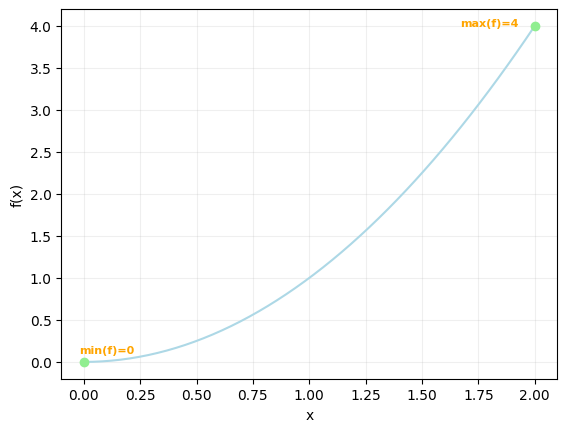

In [68]:
range_of_f = f(D)

fig, ax = plt.subplots()
ax.plot(D, range_of_f, color="lightblue")
min_index = np.argmin(range_of_f)
min_x = D[min_index]
min_y = range_of_f[min_index]

max_index = np.argmax(range_of_f)
max_x = D[max_index]
max_y = range_of_f[max_index]

ax.plot(max_x, max_y, marker="o", color="lightgreen")
ax.plot(min_x, min_y, marker="o", color="lightgreen")
ax.text(
    min_x + 0.1,
    min_y + 0.1,
    "min(f)=0",
    fontsize=8,
    fontweight="bold",
    ha="center",
    color="orange",
)

ax.text(
    max_x - 0.20,
    max_y,
    "max(f)=4",
    fontsize=8,
    fontweight="bold",
    ha="center",
    color="orange",
)

ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(alpha=0.2)

plt.show()

### 2. A Small (But Practically Large¹) Technicality

So what is a function? A function $f$ is a subset of $D\times R$ such that whenever $(x,y)\in f$ and $(x,z)\in f$ then $y=z$². It's obvious, from a purely theoretical POV, we can't have a function without a specified domain. 

BUT!

Yes, there is a but here, in practice we can have functions that are domainly restricted - these are objects we call restrictions - a restriction of $f$ to some subset $E$ of $D$. That is, the restriction of the function $f: D \to C$ is the function $g$ whose domain is $E\subseteq D$ and whose range is $C$ such that $f(x) = g(x)$ for all $x\in E$³. Analogously, we can define $f^*$ - an extention of $f$ - whose domain is the superset $D^*$ of $D$. Let's now unpack how it works. 





**Notes:**

¹ Pun intended

² Douglas Smith, Maurice Eggen, and Richard St. Andre. A Transition to Advanced Mathematics. 8th ed., Cengage Learning, 2014. Chapter 4.

³ Walter Rudin. Principles of Mathematical Analysis. 3rd ed., McGraw–Hill, 1976. Chapter 4.

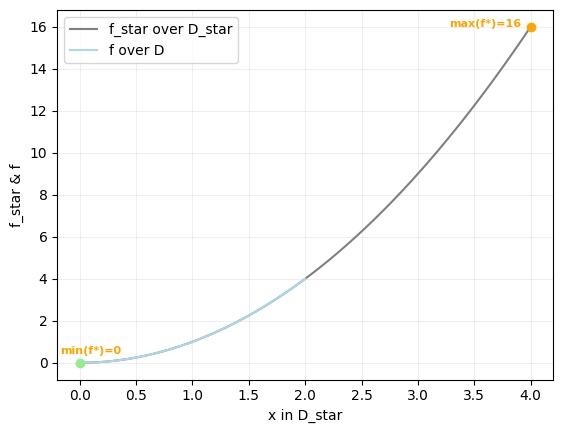

In [69]:
import numpy as np

D_star = np.linspace(start=0, stop=4, num=50, dtype=float)

range_of_f_star = f(D_star)

fig, ax = plt.subplots()
ax.plot(D_star, range_of_f_star, color="grey", label="f_star over D_star")
ax.plot(D, range_of_f, color="lightblue", label="f over D")
min_index_star = np.argmin(range_of_f_star)
min_x_star = D_star[min_index_star]
min_y_star = range_of_f_star[min_index_star]

max_index_star = np.argmax(range_of_f_star)
max_x_star = D_star[max_index_star]
max_y_star = range_of_f_star[max_index_star]

ax.plot(max_x_star, max_y_star, marker="o", color="orange")
ax.plot(min_x_star, min_y_star, marker="o", color="lightgreen")

ax.text(
    min_x_star + 0.1,
    min_y_star + 0.4,
    "min(f*)=0",
    fontsize=8,
    fontweight="bold",
    ha="center",
    color="orange",
)

ax.text(
    max_x_star - 0.4,
    max_y_star,
    "max(f*)=16",
    fontsize=8,
    fontweight="bold",
    ha="center",
    color="orange",
)

ax.set_xlabel("x in D_star")
ax.set_ylabel("f_star & f")
ax.legend()
ax.grid(alpha=0.2)

plt.show()

### 3. Extreme Value Theorem - A Practical Application
Every continuous function attains its supremum and infimum on a closed and bounded domain¹. "Okay, sure, but what's the point?" I know that's exactly what you are asking right now.

Well, fortunately for us, some smart guys told us how to find these gremlins!

If there exists a local minimum or maximum value at a point c for some differentiable function, then $f'(c)=0$²³.

Let's find 'em!

¹ You can refer to Jay Cummings, Real Analysis: A Long Form Mathematics Textbook, 2nd ed., Chapter 6, for a very accessible proof.

² William L. Briggs, Lyle Cochran, Bernard Gillett, and Eric Schulz. Calculus: Early Transcendentals. Pearson, 3rd ed., 2019. Chapter 4.

³ To be pedantic differentiability is a local phenomenon - but we'll let analysts deal with that. 

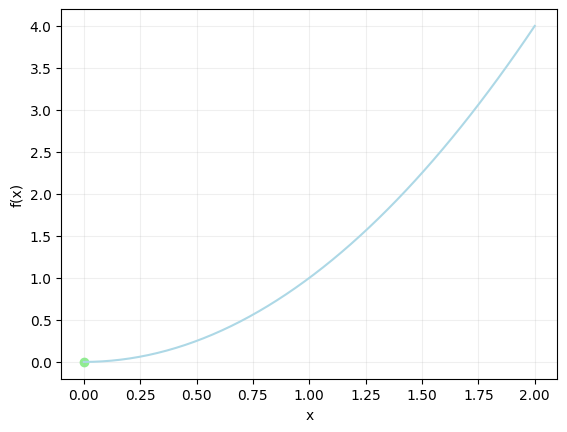

In [70]:
def f_prime(x):
    return  2*x

critical_points = f_prime(D)==0



range_of_f = f(D)

fig, ax = plt.subplots()
ax.plot(D, range_of_f, color="lightblue")


critical_x = D[critical_points]
min_and_max = f(D[critical_points])

ax.scatter(critical_x, min_and_max, marker="o", color="lightgreen")

ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(alpha=0.2)


### 4. Global/Absolute Extreme Values

Wait! Something odd is happening here!

Where's the maximum? 

I remember naming my variable "min_and_max"!

Well, as  Briggs, Cochran, Gillett, and Schulz said¹, we need to check the endpoints. Some gremlins like to hide at the edges of existence...



¹ William L. Briggs, Lyle Cochran, Bernard Gillett, and Eric Schulz. Calculus: Early Transcendentals. Pearson, 3rd ed., 2019. Chapter 4.

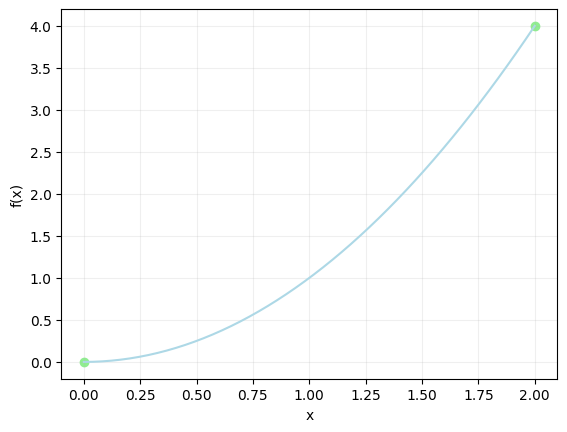

In [71]:
edge_gremlin = D[np.argmax(D)]


def f_prime(x):
    return 2 * x


critical_points = f_prime(D) == 0


range_of_f = f(D)

fig, ax = plt.subplots()
ax.plot(D, range_of_f, color="lightblue")


critical_x = D[critical_points]
min_and_max = f(D[critical_points])

critical_and_edge_points = np.append(critical_x, edge_gremlin)
min_and_max_complete = np.append(min_and_max, f(edge_gremlin))

ax.scatter(
    critical_and_edge_points, min_and_max_complete, marker="o", color="lightgreen"
)

ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(alpha=0.2)

### 5. The Unexorcised Curse of Section 2 Still Haunts

As we saw how our initial search for critical points only gave us the local minimum, this issue is far more general than it looks. When we artificially restrict a function, there is a very high chance, especially in a higher-dimensional manifold, of getting stuck at a local minimum or maximum. This normally occurs when we are optimizing our cost functions¹.

Let's unpack this.

¹ Aurélien Géron. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. 3rd ed., O’Reilly Media, 2023. Chapter 4.

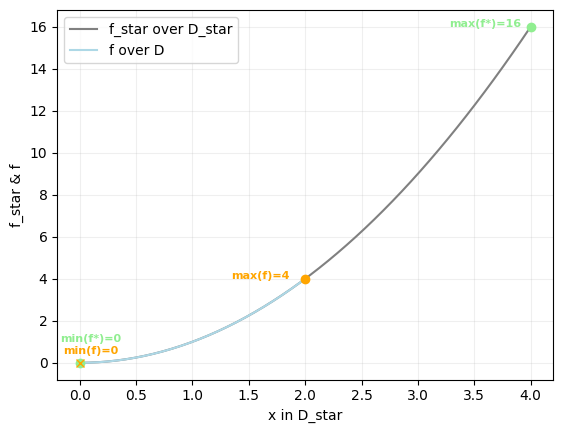

In [72]:
import numpy as np

D_star = np.linspace(start=0, stop=4, num=50, dtype=float)

range_of_f_star = f(D_star)

fig, ax = plt.subplots()
ax.plot(D_star, range_of_f_star, color="grey", label="f_star over D_star")
ax.plot(D, range_of_f, color="lightblue", label="f over D")
min_index_star = np.argmin(range_of_f_star)
min_x_star = D_star[min_index_star]
min_y_star = range_of_f_star[min_index_star]

max_index_star = np.argmax(range_of_f_star)
max_x_star = D_star[max_index_star]
max_y_star = range_of_f_star[max_index_star]

ax.plot(max_x, max_y, marker="o", color="orange")
ax.plot(min_x_star, min_y_star, marker="o", color="lightgreen")
ax.plot(min_x, min_y, marker="x", color="orange")
ax.plot(max_x_star, max_y_star, marker="o", color="lightgreen")

ax.text(
    min_x + 0.1,
    min_y + 0.4,
    "min(f)=0",
    fontsize=8,
    fontweight="bold",
    ha="center",
    color="orange",
)

ax.text(
    max_x - 0.4,
    max_y,
    "max(f)=4",
    fontsize=8,
    fontweight="bold",
    ha="center",
    color="orange",
)

ax.text(
    min_x_star + 0.1,
    min_y_star + 1,
    "min(f*)=0",
    fontsize=8,
    fontweight="bold",
    ha="center",
    color="lightgreen",
)


ax.text(
    max_x_star - 0.4,
    max_y_star,
    "max(f*)=16",
    fontsize=8,
    fontweight="bold",
    ha="center",
    color="lightgreen",
)

ax.set_xlabel("x in D_star")
ax.set_ylabel("f_star & f")
ax.legend()
ax.grid(alpha=0.2)

plt.show()

### 6. Let's Bag our words
Machines can't read, they don't have intuition or comprehension - except for ChatGPT, obviously. So, in order to make our sentences digestible we will need to vectorize them. One of the simplest ways to do this is  by treating a sentence as a bag of words: no order, no structure, no relationship between words.

So "James is a joke" becomes

 $\{James, is, a, joke\}=\{is, joke, a, James\}\dots$

If you don't want to fret it, might as well call it a set.


In [73]:
import pandas as pd
pd.set_option("mode.copy_on_write", True)
messages = pd.read_csv("SMSSpamCollection",sep="\t", header=None)


### 6.5. Stratification  

We need a stratified train-test split.

Though I will not implement it from scratch, but a quick overview won't hurt.

Roughly 86.6% of the dataset is ham while 13.4% is spam. 

All that it means is that we will have to take this disproportionality into consideration when we are splitting our data. Our train-test split should likewise hold the same proportionality. Otherwise there is a very high chance of training on garbage proportions. 

1. Split data into spam/ham.
2. split spam/ham proportionally.
3. assign train-test.

Let's Monte Carlo our way out of this wet paper bag.

In [74]:
spam_ham=messages[0]
spam_ham = spam_ham.to_numpy()

In [75]:
import numpy as np
from tqdm import trange

labels = (spam_ham == "spam").astype(int)

shuffles = np.array([np.random.permutation(len(spam_ham)) for _ in trange(100000)])
train_sets = shuffles[:, : int(0.8 * len(labels))]

props = labels[train_sets].sum(axis=1)

100%|██████████| 100000/100000 [00:13<00:00, 7561.05it/s]


This shows two things:

1. that on average we might - for a moderate sized dataset - get proportional train and test split.

In [76]:
print(f"Average spam per train set: {np.average(props)} - total is: 747")
print(f"minimum spam per train set: {np.min(props)}")
print(f"maximim spam per train set: {np.max(props)}")

Average spam per train set: 597.48672 - total is: 747
minimum spam per train set: 546
maximim spam per train set: 638


2. But the spread around that average is absolutely not reliable.

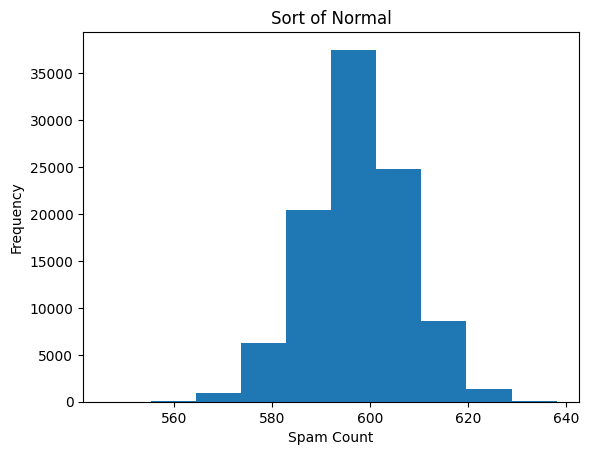

In [77]:
import matplotlib.pyplot as plt

plt.hist(props)
plt.title("Sort of Normal")
plt.xlabel("Spam Count")
plt.ylabel("Frequency")
plt.show()


In [78]:
print(f"var: {np.var(props)}")

var: 103.83364364159999


Interestingly when $n$ sufficiently large it approximates a normal distribution, that's exactly what we see.

### 7. Back to Bagging

In [79]:
from sklearn.model_selection import train_test_split

train_messages, test_messages = train_test_split(messages, train_size=0.8, stratify=messages.iloc[:,0])


In [80]:
train_messages

,0,1
2998,ham,Don know..he is watching film in computer..
5146,ham,Oh unintentionally not bad timing. Great. Fing...
1996,ham,Shall i come to get pickle
2839,ham,Were trying to find a Chinese food place aroun...
4147,ham,I cant wait for cornwall. Hope tonight isnt ...
...,...,...
3781,ham,Then ur physics get a-?
5276,ham,Dunno leh cant remember mayb lor. So wat time ...
2060,ham,He didn't see his shadow. We get an early spri...
1883,ham,"Sorry, I can't help you on this."


Essentially we will create two vectors:

1. $\vec{x}$, where $|\vec{x}| = |\mathcal{V}|$ and $\mathcal{V}$ is the set of all possible distinct words in our vocabulary.
2. A helper "vector" - technically an object array: $\vec{v}$ which is vectorized $\mathcal{V}$ for bookkeeping:

Here $w_i$ is the word stored at position $i$ in $\vec{v}$, and $x_i \in \vec{x}$ is its count.

In [81]:
from collections import Counter
from itertools import chain

def b_o_w(messages: pd.DataFrame):
    '''Returns alligned arrays of vocab and counts'''
    messages[2] = messages[1].apply(lambda message: message.lower().split())
    messages[3] = messages[2].apply(Counter)
    vocabulary = Counter(chain.from_iterable(messages[2]))
    bag_of_words = np.array(list(vocabulary.items()))
    vocab = bag_of_words[:,0]
    counts = bag_of_words[:,1].astype(int)
    return vocab, counts

In [82]:
#%%timeit

vocab, counts = b_o_w(messages)

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase=True)


In [84]:
%%timeit
X = cv.fit_transform(messages[1])


98.1 ms ± 5.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


A short aside: `b_o_w` as implemented here outperforms Sklearns `CountVectorizer` by quite a bit - though that's mostly due to the fact that `CountVectorizer` is a sparse matrix of size $m\times n$: $m$ messages and $n$ words in our universal vocabulary.

### 8. Score/Weight Matrix!

Bare counts don't do much on their own. We need some kind of "connection" between our bag of words vector $\vec{x}$ and the label $y \in \mathcal{Y}$, where $\mathcal{Y}$ is just the set of possible labels. This would be our score/weight¹  matrix $\Theta$².

¹ Depending on how theoretical the author feels, you might see “score” or “weight.” The more math-leaning sources usually stick to “weight.”

² Eisenstein, Jacob. Introduction to Natural Language Processing. Cambridge, MA: MIT Press, 2019. Chapter 2

In [85]:
def score_vec(message_vocab: np.ndarray, message_weights: np.ndarray):
    """Returns a 2-element vector"""
    score_out = np.dot(message_weights.T, message_vocab)
    return score_out

### 9. Weight Function Function

We define the weight function $\Psi(\Theta,x_j)=\Theta\cdot x_j$. 

A quick caveat: $x_j$ is not $j^{\text{th}}$ word in $\vec{v}$. It is the labelled, tokenized sentence $s_j$, its own mini bag of words.

we are essentially optimizing $$\Psi(\Theta,x_j)=\Theta\cdot x_j$$ for $y$.

### 10. Naive Bayes
Refer to my repo: toy-to-theory-naive-bayes (https://github.com/MuzamilSaiq/toy-to-theory-naive-bayes) for a cursory overview of this method.


In [86]:
def naivebayes(dataset: pd.DataFrame, vocab: np.ndarray):
    '''Returns weights, ham, spam'''
    dataset = dataset.copy()
    weights = np.zeros((len(vocab), 2))

    ham = dataset[dataset[0] == "ham"]
    spam = dataset[dataset[0] == "spam"]



    ham_words, ham_counts = b_o_w(ham)
    total_ham_words = sum(ham_counts)

    h_word_counts = {word: int(count) for word, count in zip(ham_words,ham_counts)}

    h_word_indices = np.array([(i, h_word_counts[word]) for i, word in enumerate(vocab) if word in h_word_counts])

    ham_word_indices, ham_word_counts = h_word_indices[:,0], h_word_indices[:,1]

    weights[ham_word_indices,0] = (ham_word_counts + 1e-6)/(total_ham_words + (1e-6*len(vocab))) 


    spam_words, spam_counts = b_o_w(spam)
    total_spam_words = sum(spam_counts)

    s_word_counts = {word: int(count) for word, count in zip(spam_words,spam_counts)}

    s_word_indices = np.array([(i, s_word_counts[word]) for i, word in enumerate(vocab) if word in s_word_counts])

    spam_word_indices, spam_word_counts = s_word_indices[:,0], s_word_indices[:,1]

    weights[spam_word_indices,1] = (spam_word_counts + 1e-6)/(total_spam_words + (1e-6*len(vocab)))

    return weights, ham, spam


### 11: Logging the weights
It is important to note why we logarithmically transform the weights: $\textstyle \prod_{x \in S}$ for some set $S$ where each $x\approx 0$ will tend to $0$. This underflow is a computational one, not a mathematical one.

In [87]:
def weight_logger(weights: np.ndarray):
    """Returns an array of logged weights"""
    weights[weights == 0] = 1e-6
    return np.log(weights)

### 12: Accuracy
Accuracy is a measure of training error rate - we could do precision and recall as well but for us this should do: $$\frac{1}{n}\sum_{i=1}^{n}\textbf{X}(y \neq \hat{y})$$ where $\textbf{X}$ is a map to $\{0,1\}$¹. In simple english, it quantifies what percentage of our data was correctly classified.

¹ Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An Introduction to Statistical Learning with Applications in Python. Springer, 2023. Chapter 2.

In [88]:
def accuracy(
    dataset: pd.DataFrame,
    weights: np.ndarray,
    vocab: np.ndarray,
    ham: pd.DataFrame = None,
    spam: pd.DataFrame = None,
):
    """Return accuracy score"""

    if ham is None or spam is None:
        ham = dataset[dataset[0] == "ham"]
        spam = dataset[dataset[0] == "spam"]

    correct_ham_prediction = 0
    incorrect_ham_prediction = 0

    for i in range(len(ham)):
        message = ham.iloc[[i]]
        message_vocab, message_counts = b_o_w(message)

        vocab_count_dictionary = {
            word: int(count) for word, count in zip(message_vocab, message_counts)
        }

        indices_list = [
            i for i, word in enumerate(vocab) if word in vocab_count_dictionary
        ]

        if len(indices_list) == 0:
            continue

        weight_indices = np.array(indices_list).astype(int)

        message_weights = weights[weight_indices]
        message_counts = np.array(
            [vocab_count_dictionary[vocab[i]] for i in weight_indices]
        )
        score = score_vec(message_counts, message_weights)
        if score[0] >= score[1]:
            correct_ham_prediction += 1
        else:
            incorrect_ham_prediction += 1

    correct_spam_prediction = 0
    incorrect_spam_prediction = 0

    for i in range(len(spam)):
        message = spam.iloc[[i]]
        message_vocab, message_counts = b_o_w(message)
        vocab_count_dictionary = {
            word: int(count) for word, count in zip(message_vocab, message_counts)
        }

        indices_list = [
            i for i, word in enumerate(vocab) if word in vocab_count_dictionary
        ]

        if len(indices_list) == 0:
            continue

        weight_indices = np.array(indices_list).astype(int)
        message_weights = weights[weight_indices]
        message_counts = np.array(
            [vocab_count_dictionary[vocab[i]] for i in weight_indices]
        )
        score = score_vec(message_counts, message_weights)
        if score[1] >= score[0]:
            correct_spam_prediction += 1
        else:
            incorrect_spam_prediction += 1

    return (correct_ham_prediction + correct_spam_prediction) / (len(ham) + len(spam))

In [89]:
def combined(dataset: pd.DataFrame):
    '''Return score'''
    vocab, _ = b_o_w(dataset)

    weights, ham, spam = naivebayes(dataset, vocab)

    logged_weights = weight_logger(weights)

    accuracy_score = accuracy(dataset, logged_weights, vocab, ham, spam)

    return accuracy_score




We get a reasonable training accuracy of $>99%$.

In [90]:
accuracy_score = combined(train_messages)
print(round(accuracy_score,3))

0.998


Similary, we get a reasonable test accuracy of $>97%$.

In [91]:
vocab, _ = b_o_w(train_messages)
weights, ham_train, spam_train = naivebayes(train_messages, vocab)
logged_weights = weight_logger(weights)


test_accuracy = accuracy(test_messages, logged_weights, vocab)
print(round(test_accuracy,3))

0.985


In [ ]:
interesting_stuff = np.column_stack((vocab, weights))
sorted_indices = interesting_stuff[:,2].argsort()

str = ""
for i in interesting_stuff[sorted_indices][:30,0]:
    str = str+i+" "


array([4125, 5107, 2400, ..., 1715, 7036, 8996], dtype=int64)

In [110]:
str

'£1 saturday! five eire. some wicklow, tariffs bray, email bt-national-rate. 8552 where congratulations! twilight exorcist, munsters, addamsfa, helpline ghost, 113, yrs dracula 200 86888 satisfy 25 donate £2.50 lots hello '

An fun exercise: Try classifying: 

`Hi John, yesterday I got a message that said: "£1 saturday! five eire. some wicklow, tariffs bray, email bt-national-rate. 8552 where congratulations! twilight exorcist, munsters, addamsfa, helpline ghost, 113, yrs dracula 200 86888 satisfy 25 donate £2.50 lots hello"`

What does your model think this means? Ham, or spam?